# Importando as Libs Necessárias

Nessa parte são realizadas as importações das bibliotecas gerais de utilização do projeto. Bibliotecas específicas serão importadas à medida em que forem sendo utilizadas durante o projeto.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Importando e visualizando os dados
Os dados do nosso projeto são fornecidos em .csv, isto é, comma-separated values, ou seja, valores separados por vírgula. Nesse tipo de arquivo, cada vírgula representa uma separação de coluna, e cada "enter" ou "quebra de linha" representa uma nova linha. Para realizar a leitura/importação do arquivo, utilizaremos uma função do pandas chamada read_csv, que recebe o nome do arquivo e o diretório e importa os dados para um tipo especial de estrutura de dado chamado DataFrames. DataFrames são estruturas matriciais de dados com os eixos indicados por nomes, tanto as colunas como as linhas. Eles possuem muitos métodos interessantes que serão abordados ao longo do curso.

- Para visualizar a forma dos dados, utilizaremos o atributo shape, que retorna uma tupla com o número de linhas e colunas do nosso dado.
- Para visualizar as 5 primeiras amostras dos nossos dados, utilizaremos um método chamado head.

In [2]:
file_path = "/home/gabriel/anaconda3/stairway_to_clustering/Wine.csv"
df = pd.read_csv(file_path) #importando os dados
print("O dado possui",df.shape[0], "amostras e", df.shape[1], "atributos")
df.head()

O dado possui 178 amostras e 14 atributos


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


A ideia do projeto é clusterizar os vinhos em segmentos de consumidores. O último atributo dos dados é exatamente isso, de tal forma, devemos remove-lo. Para fazer isso, podemos utilizar uma função dos DataFrames chamada \textbf{drop}, que recebe o nome da coluna ou linha a ser deletada.

In [3]:
labels_df = df['Customer_Segment']
df = df.drop(columns = 'Customer_Segment')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Caso conhecessemos os dados previamente e soubessemos que a ultima coluna era a dos labels que não nos importa no momento, poderíamos tê-lo importado sem essa coluna, utilizando a seguinte linha de código:

df = pd.read_csv('Wine.csv', usecols=[i for i in range(12)])

Como nossas colunas estão todas em inglês, podemos traduzir as mais legíveis (aquelas que não são substâncias químicas doidas) para o português


In [4]:
df = df.rename(columns = {'Alcohol' : 'Alcool', 'Ash' : 'Pó', 'Ash_Alcalinity': 'Alcalinidade_pó', 'Magnesium' : 'Magnésio','Total_Phenols' : 'Total_Fenóis','Nonflavanoid_Phenols':'Fenóis_nãoflavlonóides','Color_Intensity':'Intensidade de cor'})
colunas = df.columns
colunas

Index(['Alcool', 'Malic_Acid', 'Pó', 'Ash_Alcanity', 'Magnésio',
       'Total_Fenóis', 'Flavanoids', 'Fenóis_nãoflavlonóides',
       'Proanthocyanins', 'Intensidade de cor', 'Hue', 'OD280', 'Proline'],
      dtype='object')

# Análise Básica dos Dados

Uma primeira análise interessante para se realizar é analisar as informações estatísticas do dado. Para fazer isso, podemos utilizar o atributo "describe", dos dataframes.
,

In [5]:
df.describe()

,Alcool,Malic_Acid,Pó,Ash_Alcanity,Magnésio,Total_Fenóis,Flavanoids,Fenóis_nãoflavlonóides,Proanthocyanins,Intensidade de cor,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Análise de Correlação

Uma segunda análise interessante para se fazer com os dados é a utilização de uma matriz de correlação. A matriz de corrlação apresenta o quanto os atributos estão relacionados entre si de maneira proporcional. Isto é, o quanto os atributos crescem ou diminuem juntos, ainda mais o quanto a forma dos atributos se parece. Para fazer isso, iremos utilizar uma biblioteca chamada biokit, que possui várias ferramentas estatísticas interessantes.

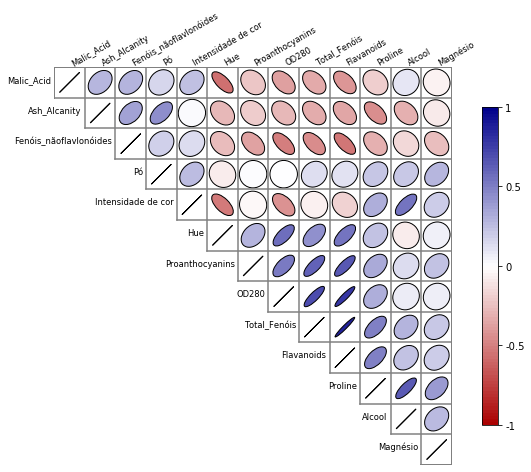

In [6]:
from biokit.viz import corrplot
matriz_corr = df.corr()
c = corrplot.Corrplot(matriz_corr)
c.plot(upper = 'ellipse')
fig = plt.gcf()
fig.set_size_inches(10, 8);

Quanto mais próximo de uma linha reta, mais se parecem os atributos. A diagonal da matriz, como é possível perceber, é composta por linhas retas, porque ela compara atributos iguais. A partir da matriz de correlação é possível perceber algumas coisas interessantes, como por exemplo que os atributos Flavanoids e Total_phenols estão muito relacionados. Isso pode ser visualizado com mais clareza na figura abaixo

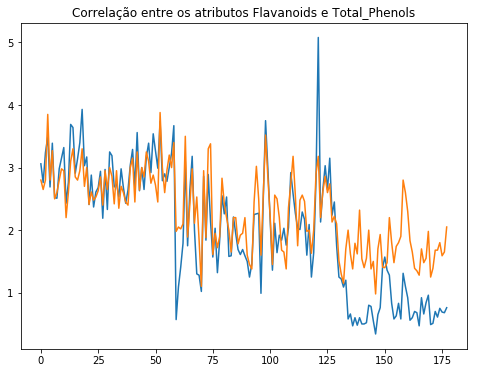

In [7]:
plt.plot([i for i in range(len(df['Flavanoids']))], df['Flavanoids'],[i for i in range(len(df['Flavanoids']))],df['Total_Fenóis'])
plt.title("Correlação entre os atributos Flavanoids e Total_Phenols")
fig = plt.gcf()
fig.set_size_inches(8, 6);
plt.show()


Como é possível perceber, a forma dos dois dados parece muito. Isso significa que os dois causam influência semelhante na clusterização/agrupamento, porque são parecidos. Assim sendo, podemos pensar em descartar um deles caso seja necessário. Como veremos adiante, alguns algoritmos de clusterização não respondem muito bem a dados com muitos atributos, ou por problema de convergência (levam muito tempo para convergir ou simplesmente não convergem) ou por problemas de precisão (se tornam mais imprecisos a medida que a quantidade de atributos aumenta)

Uma outra forma de visualizar essa relação é utilizando cada um dos atributos como um eixo na figura. Como eles tem um alto grau de correlação, deveremos ver algo semelhante a uma linha.

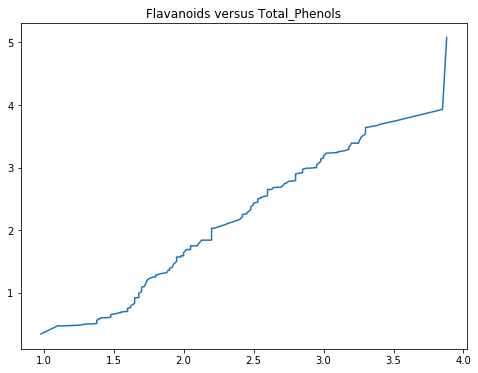

In [8]:
plt.plot(df['Total_Fenóis'].sort_values(),df['Flavanoids'].sort_values())
plt.title("Flavanoids versus Total_Phenols")
fig = plt.gcf()
fig.set_size_inches(8,6)

Como já mencionado, atributos com alta correlação contribuem de forma redundante para a clusterização. É possível perceber na matriz de correlação que ainda existem mais atributos com um alto grau de correlação que também podem ser explorados para diminuir ainda mais a complexidade do nosso dado sem prejudicar o nosso agrupamento. 

Dados com valores de correlação próximos de zero são fundamentais para clusterização. Enquanto atributos semelhantes contribuem pouco individualmente, atributos diferentes contribuem muito, porque guardam muita informação não redundante.


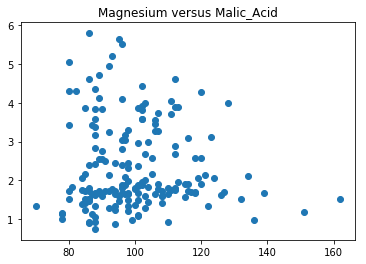

In [9]:
plt.scatter(df['Magnésio'], df['Malic_Acid'])
plt.title('Magnesium versus Malic_Acid')
plt.show()

Como é possível perceber, a relação entre esses atributos é quase inexistente, de tal modo podemos considerar a principio que ambos contém informação relevante.

In [10]:
from sklearn import preprocessing
#x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(min_max_scaler.fit_transform(df))
#df = pd.DataFrame(x_scaled)
df.columns = colunas
df.head()

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Alcool,Malic_Acid,Pó,Ash_Alcanity,Magnésio,Total_Fenóis,Flavanoids,Fenóis_nãoflavlonóides,Proanthocyanins,Intensidade de cor,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


# K - Means

Para a primeira abordagem do K-means, vamos considerar que você é um especialista em mercado de vinhos e sabe que existem 3 grandes grupos de consumidores. Assim sendo, você sabe que o número de clustereres será 3.

Para a Clusterização com K-means, utilizaremos a biblioteca do scikit-learn

In [11]:
from sklearn.cluster import KMeans
agrupador = KMeans(n_clusters=3)
agrupador.fit(df) #Explicar cada parâmetro do KMeans

#labels/números dos clústeres
labels = agrupador.labels_

#centróides de cada cluster
centroides = pd.DataFrame(agrupador.cluster_centers_)
centroides.columns = colunas
centroides.head()

,Alcool,Malic_Acid,Pó,Ash_Alcanity,Magnésio,Total_Fenóis,Flavanoids,Fenóis_nãoflavlonóides,Proanthocyanins,Intensidade de cor,Hue,OD280,Proline
0,0.705651,0.248429,0.584904,0.344431,0.410727,0.642114,0.554679,0.300340,0.477272,0.355340,0.477809,0.690386,0.593894
1,0.546686,0.484409,0.561596,0.538660,0.315217,0.246743,0.104743,0.614256,0.225435,0.488781,0.188889,0.158527,0.249115
2,0.313367,0.235617,0.473050,0.500245,0.245514,0.448057,0.380082,0.418688,0.397176,0.147787,0.472190,0.584220,0.156375


Como é possível perceber, os dados foram clusterizados com sucesso em três clústeres bem definidos. Para analisar os clústeres, podemos selecionar de dois ou três atributos que pareçam fazer sentido serem analisados juntos para ver como a clusterização ficou distribuida. Por exemplo, peguemos a densidade e a cor

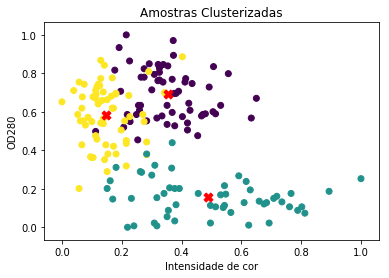

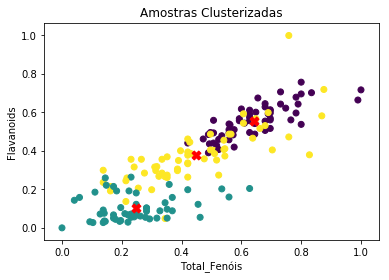

In [12]:
plt.scatter(df['Intensidade de cor'], df['OD280'], c = agrupador.labels_.astype(np.float))
plt.scatter(centroides['Intensidade de cor'], centroides['OD280'], c = 'r', marker = 'X', s = 80)
plt.xlabel('Intensidade de cor')
plt.ylabel('OD280')
plt.title('Amostras Clusterizadas')
plt.show()

plt.scatter(df['Total_Fenóis'], df['Flavanoids'], c = agrupador.labels_.astype(np.float))
plt.scatter(centroides['Total_Fenóis'], centroides['Flavanoids'], c = 'r', marker = 'X', s = 80)
plt.xlabel('Total_Fenóis')
plt.ylabel('Flavanoids')
plt.title('Amostras Clusterizadas')
plt.show()

In [13]:
df2 = df.drop(columns = 'Flavanoids')
agrupador = KMeans(n_clusters=3)
agrupador.fit(df) #Explicar cada parâmetro do KMeans
agrupador.labels_
agrupador.cluster_centers_

array([[0.31137521, 0.23689915, 0.47291703, 0.49991686, 0.2477209 ,
        0.45305895, 0.38240098, 0.4117468 , 0.39742546, 0.14773478,
        0.47351167, 0.58897554, 0.15640099],
       [0.544689  , 0.47844053, 0.56013612, 0.53833177, 0.31146245,
        0.24476489, 0.10713464, 0.61852487, 0.22827646, 0.4826404 ,
        0.19254989, 0.16090576, 0.24739982],
       [0.70565142, 0.24842869, 0.58490401, 0.3444313 , 0.41072701,
        0.64211419, 0.55467939, 0.30034024, 0.47727155, 0.35534046,
        0.47780888, 0.69038612, 0.59389397]])

In [52]:
print(labels)
print(agrupador.labels_)
print(labels - agrupador.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 2 2 2 2 1 2 1 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 0 2 2 0 2 0 2 0
 0 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  2  0 -1  2 -1  2
  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

# K-Means Minibatch (bonus)

In [51]:
from sklearn.cluster import MiniBatchKMeans
agrupador = MiniBatchKMeans(n_clusters=3, batch_size=4)
agrupador.fit(df2)
labels_mini_batch = agrupador.labels_
print(labels_mini_batch)
print(labels)
print(labels_mini_batch - labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 0 2 2 0 2 0 2 0
 0 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 2 2 2 2 1 2 1 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0 -2  0  1 -2  1 -2
  0  0 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [49]:
labels_df = labels_df.replace(1,0)
labels_df = labels_df.replace(2,1)
labels_df = labels_df.replace(3,2)

index = []
for x in range(len(labels_df)):
  if labels_df[x] != labels[x]:
    index.append(x)

print("As amostras clusterizadas de maneira errada foram: ", index)

As amostras clusterizadas de maneira errada foram:  [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]


# K-Medoids

In [17]:
from pyclustering.cluster.kmedoids import kmedoids
kmedoids_instance = kmedoids(np.array(df),[1, 60, 140])
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()
print(clusters)
print(medoids)
labels_kmedoids = np.zeros((len(df),1))
for i in range(3):
  num_it = len(clusters[i])
  for j in range(num_it):
    if(i == 0):
      labels_kmedoids[clusters[i][j]] = 0
    if(i == 1): 
      labels_kmedoids[clusters[i][j]] = 1
    if(i == 2):
      labels_kmedoids[clusters[i][j]] = 2
      
labels_kmedoids = np.reshape(labels_kmedoids, labels_df.shape)
print(sum(abs(labels_kmedoids - labels_df)))


[[35, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 63, 66, 67, 69, 71, 73, 74, 79, 81, 84, 93, 94, 95, 98, 102, 104, 109, 110, 120, 121, 123, 124, 126], [86, 59, 60, 61, 62, 64, 65, 68, 70, 72, 75, 76, 77, 78, 80, 82, 85, 87, 88, 89, 90, 91, 92, 96, 97, 99, 100, 101, 103, 105, 106, 107, 108, 111, 112, 113, 114, 115, 116, 117, 119, 122, 125, 127, 128, 129], [148, 83, 118, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177]]
[35, 86, 148]
25.0


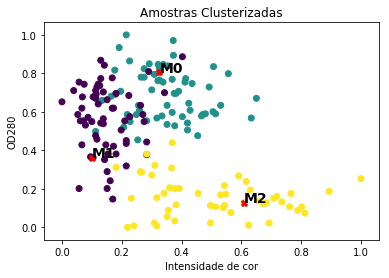

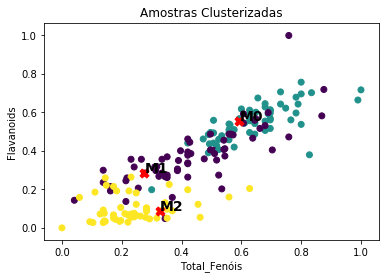

In [18]:
meds = pd.DataFrame((np.array([df.iloc[medoids[0]], df.iloc[medoids[1]], df.iloc[medoids[2]]])),columns = colunas)
meds.head()
plt.scatter(df['Intensidade de cor'], df['OD280'], c = agrupador.labels_.astype(np.float))
plt.scatter(meds['Intensidade de cor'], meds['OD280'], c = 'r', marker = 'X')
plt.text(meds['Intensidade de cor'].iloc[0], meds['OD280'].iloc[0], 'M0', fontsize=14, fontweight='bold')
plt.text(meds['Intensidade de cor'].iloc[1], meds['OD280'].iloc[1], 'M1', fontsize=14, fontweight='bold')
plt.text(meds['Intensidade de cor'].iloc[2], meds['OD280'].iloc[2], 'M2', fontsize=14, fontweight='bold')
plt.xlabel('Intensidade de cor')
plt.ylabel('OD280')
plt.title('Amostras Clusterizadas')
plt.show()

plt.scatter(df['Total_Fenóis'], df['Flavanoids'], c = agrupador.labels_.astype(np.float))
plt.scatter(meds['Total_Fenóis'], meds['Flavanoids'], c = 'r', marker = 'X', s = 80)
plt.text(meds['Total_Fenóis'].iloc[0], meds['Flavanoids'].iloc[0], 'M0', fontsize=14, fontweight='bold')
plt.text(meds['Total_Fenóis'].iloc[1], meds['Flavanoids'].iloc[1], 'M1', fontsize=14, fontweight='bold')
plt.text(meds['Total_Fenóis'].iloc[2], meds['Flavanoids'].iloc[2], 'M2', fontsize=14, fontweight='bold')
plt.xlabel('Total_Fenóis')
plt.ylabel('Flavanoids')
plt.title('Amostras Clusterizadas')
plt.show()

# K-medians

In [19]:
from pyclustering.cluster.kmedians import kmedians

In [23]:
# Create instance of K-Medians algorithm
medianas_iniciais = [np.array(df.iloc[1]), np.array(df.iloc[50]), np.array(df.iloc[120])] #medianas iniciais
kmedians_instance = kmedians(np.array(df), medianas_iniciais) #cria a instância do modelo
kmedians_instance.process()
clusters = kmedians_instance.get_clusters()
medians = kmedians_instance.get_medians()


In [47]:
labels_kmedians = np.zeros((len(df),1))
for i in range(3):
  num_it = len(clusters[i])
  for j in range(num_it):
    if(i == 0):
      labels_kmedians[clusters[i][j]] = 0
    if(i == 1): 
      labels_kmedians[clusters[i][j]] = 1
    if(i == 2):
      labels_kmedians[clusters[i][j]] = 2

from sklearn import metrics
labels_kmedians = np.reshape(labels_kmedoids, labels_df.shape)

print(metrics.adjusted_mutual_info_score(labels_kmedoids, labels_df))
print(metrics.normalized_mutual_info_score(labels_kmedoids, labels_df))

0.7017095790067267
0.7123069852081546


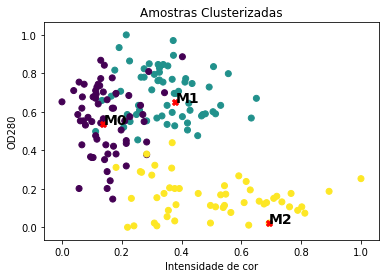

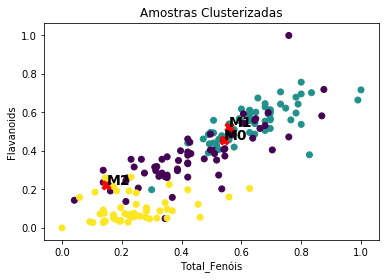

In [35]:
medians = pd.DataFrame((np.array([medians[0], medians[1], medians[2]])),columns = colunas)
medians.head()
plt.scatter(df['Intensidade de cor'], df['OD280'], c = agrupador.labels_.astype(np.float))
plt.scatter(meds['Intensidade de cor'], medians['OD280'], c = 'r', marker = 'X')
plt.text(medians['Intensidade de cor'].iloc[0], medians['OD280'].iloc[0], 'M0', fontsize=14, fontweight='bold')
plt.text(medians['Intensidade de cor'].iloc[1], medians['OD280'].iloc[1], 'M1', fontsize=14, fontweight='bold')
plt.text(medians['Intensidade de cor'].iloc[2], medians['OD280'].iloc[2], 'M2', fontsize=14, fontweight='bold')
plt.xlabel('Intensidade de cor')
plt.ylabel('OD280')
plt.title('Amostras Clusterizadas')
plt.show()

plt.scatter(df['Total_Fenóis'], df['Flavanoids'], c = agrupador.labels_.astype(np.float))
plt.scatter(medians['Total_Fenóis'], medians['Flavanoids'], c = 'r', marker = 'X', s = 80)
plt.text(medians['Total_Fenóis'].iloc[0], medians['Flavanoids'].iloc[0], 'M0', fontsize=14, fontweight='bold')
plt.text(medians['Total_Fenóis'].iloc[1], medians['Flavanoids'].iloc[1], 'M1', fontsize=14, fontweight='bold')
plt.text(medians['Total_Fenóis'].iloc[2], medians['Flavanoids'].iloc[2], 'M2', fontsize=14, fontweight='bold')
plt.xlabel('Total_Fenóis')
plt.ylabel('Flavanoids')
plt.title('Amostras Clusterizadas')
plt.show()

# Silhouette Coefficient

In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [57]:
range_n_clusters = [i for i in range(2,10)]
silhouette_values = []
for cluster in range_n_clusters:
    clusterer = KMeans(n_clusters=cluster, random_state=10) #random state para inicializar sempre no mesmo local
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_values.append(silhouette_avg)


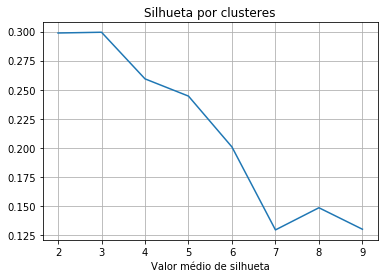

In [61]:
silhouette_values
plt.plot(range_n_clusters, silhouette_values)
plt.xlabel("Número de Clusters")
plt.ylabel("Valor médio de silhueta")
plt.title("Silhueta por clusteres")
plt.grid()
plt.show()

# Davies-Boundin Index

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarn

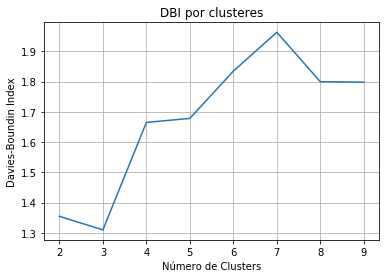

In [64]:
from sklearn.metrics import davies_bouldin_score
range_n_clusters = [i for i in range(2,10)]
dbs_values = []
for cluster in range_n_clusters:
    clusterer = KMeans(n_clusters=cluster, random_state=10) #random state para inicializar sempre no mesmo local
    cluster_labels = clusterer.fit_predict(df)
    dbs = davies_bouldin_score(df, cluster_labels)
    dbs_values.append(dbs)

    
plt.plot(range_n_clusters, dbs_values)
plt.xlabel("Número de Clusters")
plt.ylabel("Davies-Boundin Index")
plt.title("DBI por clusteres")
plt.grid()
plt.show()
    
    